In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

### Training

In [2]:
digits_data = pd.read_csv('mnist_train.csv')

In [3]:
digits_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = digits_data.drop('label',axis=1)
y = digits_data.label

In [5]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [6]:
y_dummies = pd.get_dummies(y)

In [62]:
pca = PCA(0.98,random_state=19)
X_pca = pca.fit_transform(X)

In [23]:
inp_layer = keras.Input(shape=(784,))
fc_layer1 = layers.Dense(128, activation='relu')(inp_layer)
fc_layer2 = layers.Dense(64, activation='relu')(fc_layer1)
fc_layer3 = layers.Dense(32, activation='relu')(fc_layer2)
output_layer = layers.Dense(10, activation='softmax')(fc_layer3)
nn_model = keras.Model(inp_layer,output_layer)
nn_model.compile(loss=keras.losses.CategoricalCrossentropy(),optimizer=keras.optimizers.RMSprop(),metrics=['accuracy'])

In [24]:
history = nn_model.fit(X, y_dummies, epochs=30, batch_size=128, validation_split=0.3)

Epoch 1/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4113 - accuracy: 0.8842 - val_loss: 0.2008 - val_accuracy: 0.9419
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1676 - accuracy: 0.9489 - val_loss: 0.1548 - val_accuracy: 0.9538
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1181 - accuracy: 0.9646 - val_loss: 0.1577 - val_accuracy: 0.9519
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.9717 - val_loss: 0.1359 - val_accuracy: 0.9619
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9785 - val_loss: 0.1380 - val_accuracy: 0.9584
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0574 - accuracy: 0.9824 - val_loss: 0.1115 - val_accuracy: 0.9698
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0447 - accuracy: 0.9858 - val_loss: 0.1309 - val_accuracy: 0.9673
Epoch 

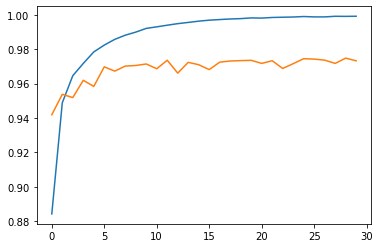

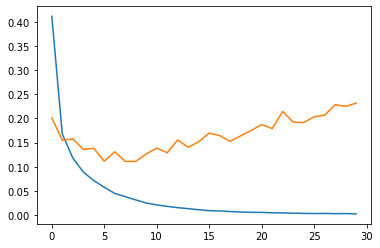

In [26]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


In [20]:
test_data = pd.read_csv('mnist_test.csv')
y_test = test_data['label']
X_test = test_data.drop(['label'],axis=1)

X_test = scaler.transform(X_test)
#X_test_pca = pca.transform(X_test)
y_test_dummies = pd.get_dummies(y_test)

In [27]:
nn_model.evaluate(X,y_dummies)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0702 - accuracy: 0.9918


[0.07016294449567795, 0.9917666912078857]

In [28]:
nn_model.evaluate(X_test,y_test_dummies)

313/313 [==============================] - 0s 1ms/step - loss: 0.1979 - accuracy: 0.9750


[0.19786398112773895, 0.9750000238418579]

#### Trying convolutional network for digit recognition

In [29]:
X_train_conv = X.reshape(60000,28,28)
X_test_conv = X_test.reshape(10000,28,28)

In [30]:
inp_layer = keras.Input(shape=(28,28,1))
conv2d_1 = layers.Conv2D(32,kernel_size=(3,3),activation='relu')(inp_layer)
maxpool2d_1 = layers.MaxPool2D(pool_size=(2,2))(conv2d_1)
conv2d_2 = layers.Conv2D(64,kernel_size=(3,3),activation='relu')(maxpool2d_1)
maxpool2d_2 = layers.MaxPool2D(pool_size=(2,2))(conv2d_2)
conv2d_3 = layers.Conv2D(64,kernel_size=(3,3),activation='relu')(maxpool2d_2)
maxpool2d_3 = layers.MaxPool2D(pool_size=(2,2))(conv2d_3)
flat_layer = layers.Flatten()(maxpool2d_3)
op_layer = layers.Dense(10,activation='softmax')(flat_layer)
cnn_model = keras.Model(inp_layer,op_layer)
cnn_model.compile(loss=keras.losses.CategoricalCrossentropy(),optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
cnn_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0   

In [35]:
fit_history = cnn_model.fit(X_train_conv, y_dummies, epochs=15,batch_size=128, validation_split=0.3)

Epoch 1/15
329/329 [==============================] - 14s 43ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0728 - val_accuracy: 0.9822
Epoch 2/15
329/329 [==============================] - 14s 43ms/step - loss: 0.0141 - accuracy: 0.9952 - val_loss: 0.0781 - val_accuracy: 0.9800
Epoch 3/15
329/329 [==============================] - 14s 43ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 0.0646 - val_accuracy: 0.9837
Epoch 4/15
329/329 [==============================] - 14s 43ms/step - loss: 0.0094 - accuracy: 0.9967 - val_loss: 0.0591 - val_accuracy: 0.9866
Epoch 5/15
329/329 [==============================] - 14s 43ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0643 - val_accuracy: 0.9853
Epoch 6/15
329/329 [==============================] - 14s 43ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0808 - val_accuracy: 0.9814
Epoch 7/15
329/329 [==============================] - 14s 43ms/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.0792 - val_accuracy:

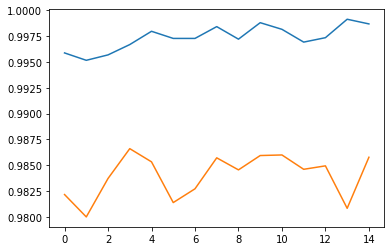

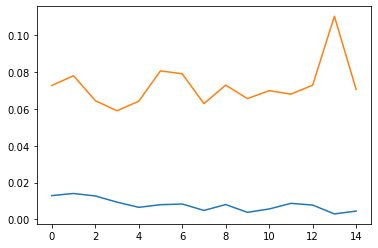

In [36]:
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.show()
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.show()

In [37]:
cnn_model.evaluate(X_train_conv,y_dummies)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0230 - accuracy: 0.9952


[0.023022033274173737, 0.9952166676521301]

In [38]:
cnn_model.evaluate(X_test_conv,y_test_dummies)

313/313 [==============================] - 1s 4ms/step - loss: 0.0729 - accuracy: 0.9853


[0.07286813110113144, 0.9853000044822693]

#### Through CNN we were able to achieve best performance as compared to SVM and AdaBoost